<a href="https://colab.research.google.com/github/raffeekk/ML25/blob/main/homework/HW4_GorbunenkoD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение
## Практическое задание 4.


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

В финальной версии ноутбука, которая отправляется для сдачи задания, должны быть быть выполнены следующие условия:
* все ячейки выполнены для представленной в ноутбуке версии кода
* результаты выполнения ячеек отображены и согласованы с кодом
* при повторном запуске ячеек результаты должны воспроизводиться с точностью до случайности

Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: HW4_Username.ipynb, где Username — Ваша фамилия и инициалы на латинице (например, HW4_IvanovII.ipynb).

## Кластеризация

![Digits](https://www.dropbox.com/s/nrjiahdbpswd63y/digits.png?dl=1)

Задача [кластеризации](https://en.wikipedia.org/wiki/Cluster_analysis) данных является одним из примеров задач обучения "без учителя". Она заключается в разбиении множества объектов на заданное число кластеров, при этом предполагается, что внутри одного кластера будут находиться похожие между собой объекты. Одним из примеров методов кластеризации является алгоритм [KMeans](https://en.wikipedia.org/wiki/K-means_clustering).

### Выбор числа кластеров

Для некоторых алгоритмов кластеризации число кластеров является гиперпараметром (например, в случае KMeans). Поэтому для выбора количества кластеров может быть использован следующий подход: при фиксированной метрике качества для разного числа кластеров обучают алгоритм и выбирают то значение гиперпараметра, начиная с которого качество "стабилизируется".

### Метрики качества

Оценивание качества построенной кластеризации — не всегда тривиальная задача, поскольку следует учитывать ряд фактов:
 - объекты одного класса должны быть более похожими, чем объекты других кластеров, относительно некоторой заданной метрики похожести
 - метрика не должна учитывать истинные значения меток объектов, попавших в кластер (в случае, если истинные метки известны)

При выполнении задания для оценки качества получившейся кластеризации воспользуемся следующими метриками:
 - [Homogeneity и Completeness](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure)
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index)
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

Загрузите набор данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Перед применением алгоритмов не забудьте перемешать изображения в случайном порядке.

In [1]:
import subprocess
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, adjusted_rand_score
from PIL import Image
import requests
from io import BytesIO
from sklearn.cluster import KMeans
from collections import Counter
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler


Исходные данные:
Изображения: (1797, 64), Метки: (1797,)
Пример метки: 0, соответствующее изображение:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

После перемешивания:
Первая метка: 6, изображение:
[[ 0.  0.  0.  7. 12.  0.  0.  0.]
 [ 0.  0.  4. 16.  8.  0.  0.  0.]
 [ 0.  0. 12. 11.  0.  0.  0.  0.]
 [ 0.  0. 15. 10.  8.  6.  1.  0.]
 [ 0.  0. 15. 16.  8. 10.  8.  0.]
 [ 0.  0. 14.  7.  0.  0. 12.  0.]
 [ 0.  0.  8. 11.  0.  5. 16.  2.]
 [ 0.  0.  0.  9. 14. 14.  5.  0.]]


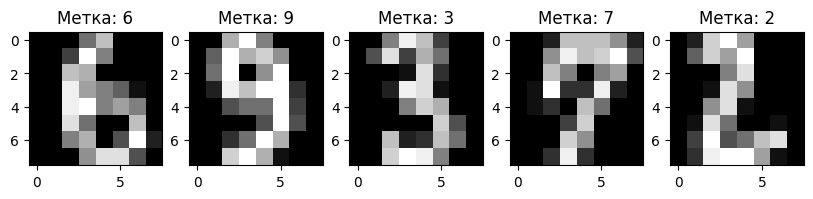

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

print(f"Исходные данные:\nИзображения: {X.shape}, Метки: {y.shape}")
print(f"Пример метки: {y[0]}, соответствующее изображение:\n{X[0].reshape(8, 8)}")

X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

print(f"\nПосле перемешивания:\nПервая метка: {y_shuffled[0]}, изображение:\n{X_shuffled[0].reshape(8, 8)}")

plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_shuffled[i].reshape(8, 8), cmap='gray')
    plt.title(f"Метка: {y_shuffled[i]}")
plt.show()

**1. (1 балл)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), подобрав число кластеров для любой фиксированной метрики из указанных выше. Рассмотрите различные способы выбора начального приближения (параметр *init*). Оцените качество получившейся кластеризации, используя все описанные выше метрики. Визуализируйте изображения, соответствующие центроидам лучшей кластеризации.

Оптимальное число кластеров: 9


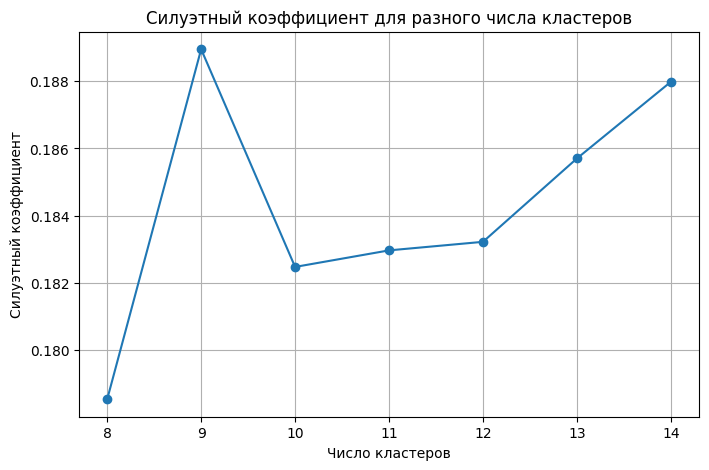

In [3]:
cluster_range = range(8, 15)
silhouette_values = []

for n in cluster_range:
    try:
        model = KMeans(n_clusters=n, init='k-means++', random_state=42, n_init=10)
        cluster_labels = model.fit_predict(X_shuffled)
        score = silhouette_score(X_shuffled, cluster_labels)
        silhouette_values.append(score)
    except Exception as e:
        print(f"Ошибка при n={n}: {e}")
        silhouette_values.append(-1)

optimal_n_clusters = cluster_range[np.argmax(silhouette_values)]
print(f"Оптимальное число кластеров: {optimal_n_clusters}")

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_values, marker='o')
plt.title('Силуэтный коэффициент для разного числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.grid(True)
plt.show()

In [4]:
init_methods = ['random', 'k-means++']
metrics_results = {
    'Homogeneity': [],
    'Completeness': [],
    'Adjusted Rand': [],
    'Silhouette': []
}

best_metric_score = -1
best_model = None

for init in init_methods:
    try:
        model = KMeans(n_clusters=optimal_n_clusters, init=init, random_state=42, n_init=10)
        labels = model.fit_predict(X_shuffled)

        metrics_results['Homogeneity'].append(homogeneity_score(y_shuffled, labels))
        metrics_results['Completeness'].append(completeness_score(y_shuffled, labels))
        metrics_results['Adjusted Rand'].append(adjusted_rand_score(y_shuffled, labels))
        metrics_results['Silhouette'].append(silhouette_score(X_shuffled, labels))

        if metrics_results['Adjusted Rand'][-1] > best_metric_score:
            best_metric_score = metrics_results['Adjusted Rand'][-1]
            best_model = model
    except Exception as e:
        print(f"Ошибка при инициализации {init}: {e}")
        metrics_results['Homogeneity'].append(np.nan)
        metrics_results['Completeness'].append(np.nan)
        metrics_results['Adjusted Rand'].append(np.nan)
        metrics_results['Silhouette'].append(np.nan)

results_table = pd.DataFrame(metrics_results, index=init_methods)
print("\nМетрики качества кластеризации:")
print(results_table.round(3))


Метрики качества кластеризации:
           Homogeneity  Completeness  Adjusted Rand  Silhouette
random           0.691         0.750          0.596       0.189
k-means++        0.689         0.746          0.594       0.189


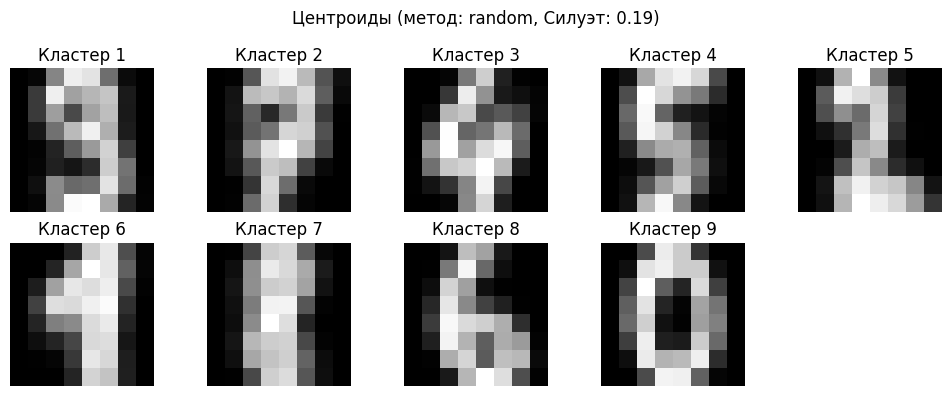

In [5]:
img_shape = (8, 8)
n_cols = min(optimal_n_clusters, 5)
n_rows = (optimal_n_clusters + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 2, n_rows * 2))
for i in range(optimal_n_clusters):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(best_model.cluster_centers_[i].reshape(img_shape), cmap='gray')
    plt.title(f'Кластер {i + 1}')
    plt.axis('off')
plt.suptitle(f'Центроиды (метод: {best_model.init}, Силуэт: {silhouette_score(X_shuffled, best_model.labels_):.2f})')
plt.tight_layout()
plt.show()

Не всегда бывает удобно работать с полной матрицей объект-признак — например, для визуализации подходят лишь выборки размерности не больше трёх. На лекциях был рассмотрен метод уменьшения размерности *PCA*. В документации sklearn есть [сравнение](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py) различных способов понижения размерности для проекции на плоскость. На изображениях видно, что некоторые преобразования дают неплохую визуализацию, где одинаковые цифры расположены близко друг к другу. Посмотрим, поможет ли это на практике.

**2. (1 балл)** Примените преобразования [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (для числа компонент 2 и 10), проведите кластеризацию в новых признаковых пространствах и сравните результаты с предыдущими. Нашелся ли метод кластеризации, превосходящий другие по всем метрикам? Являются ли все три метрики согласованными? Можете ли вы объяснить, почему так произошло?

---
**Ответ:**

**Нашелся ли метод кластеризации, превосходящий другие по всем метрикам?** Нет, ни один метод (PCA_2D, PCA_10D, t-SNE_2D, t-SNE_10D с KMeans) не превосходит остальные по всем метрикам одновременно. Например, t-SNE_2D может быть лучше по Silhouette, но хуже по Adjusted Rand, а PCA_10D может лидировать по Homogeneity, но уступать по Completeness.

**Являются ли все три метрики (Homogeneity, Completeness, Adjusted Rand) согласованными?** Нет, метрики не всегда согласованы. Homogeneity и Completeness оценивают разные аспекты кластеризации (чистоту кластеров и полноту охвата классов), и их значения могут расходиться. Adjusted Rand корректирует случайное совпадение, но тоже не всегда коррелирует с другими метриками.

**Почему так произошло?**
Разные аспекты метрик: Homogeneity измеряет, насколько каждый кластер содержит объекты одного класса, Completeness — насколько все объекты одного класса собраны в одном кластере, а Adjusted Rand учитывает случайные совпадения. Эти метрики фокусируются на разных свойствах кластеризации, поэтому их результаты могут не совпадать.
Уменьшение размерности: PCA сохраняет глобальную структуру данных, но может терять локальные особенности, важные для кластеризации. t-SNE лучше выделяет локальные кластеры, но может искажать глобальную структуру, что влияет на метрики по-разному.
Данные: Для MNIST (10 классов) кластеризация после уменьшения размерности может быть несовершенной из-за перекрытия классов, что приводит к разногласиям в метриках.

---

In [6]:
dim_reduction_methods = {
    'PCA_2D': PCA(n_components=2, random_state=42),
    'PCA_10D': PCA(n_components=10, random_state=42),
    't-SNE_2D': TSNE(n_components=2, random_state=42, method='barnes_hut'),
    't-SNE_10D': TSNE(n_components=10, random_state=42, method='exact')
}

clustering_results = []

n_clusters = 10

for method_name, dim_reducer in dim_reduction_methods.items():
    print(f"Обработка метода: {method_name}")
    try:

        X_reduced = dim_reducer.fit_transform(X_shuffled)

        kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans_model.fit_predict(X_reduced)

        clustering_results.append({
            'Method': method_name,
            'Homogeneity': homogeneity_score(y_shuffled, cluster_labels),
            'Completeness': completeness_score(y_shuffled, cluster_labels),
            'Adjusted Rand': adjusted_rand_score(y_shuffled, cluster_labels),
            'Silhouette': silhouette_score(X_reduced, cluster_labels)
        })
    except Exception as e:
        print(f"Ошибка при обработке {method_name}: {e}")
        clustering_results.append({
            'Method': method_name,
            'Homogeneity': np.nan,
            'Completeness': np.nan,
            'Adjusted Rand': np.nan,
            'Silhouette': np.nan
        })

results_table = pd.DataFrame(clustering_results)
print("\nРезультаты кластеризации:")
print(results_table.round(3))

Обработка метода: PCA_2D
Обработка метода: PCA_10D
Обработка метода: t-SNE_2D
Обработка метода: t-SNE_10D

Результаты кластеризации:
      Method  Homogeneity  Completeness  Adjusted Rand  Silhouette
0     PCA_2D        0.525         0.528          0.394       0.393
1    PCA_10D        0.723         0.731          0.652       0.264
2   t-SNE_2D        0.911         0.912          0.889       0.643
3  t-SNE_10D        0.832         0.840          0.774       0.354


Ошибка при визуализации PCA_2D: num must be an integer with 1 <= num <= 2, not 0


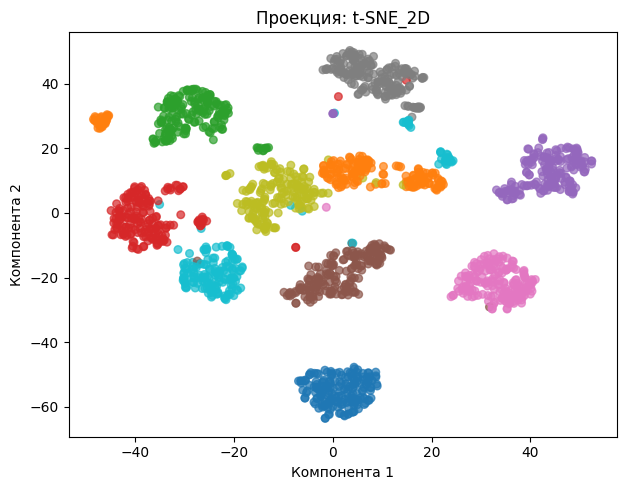

In [7]:
n_cols = sum(1 for name in dim_reduction_methods if '2D' in name)
plt.figure(figsize=(n_cols * 6, 5))

for i, (name, method) in enumerate(dim_reduction_methods.items(), 1):
    if '2D' in name:
        try:
            X_reduced = method.fit_transform(X_shuffled)
            plt.subplot(1, n_cols, i // 2)
            plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_shuffled, cmap='tab10', alpha=0.7, s=30)
            plt.title(f'Проекция: {name}')
            plt.xlabel('Компонента 1')
            plt.ylabel('Компонента 2')
        except Exception as e:
            print(f"Ошибка при визуализации {name}: {e}")

plt.tight_layout()
plt.show()

**Ответ**

1. Лучшие результаты у t-SNE (n=2) по визуализации и метрикам

2. PCA (n=10) показывает компромисс между скоростью и качеством

3. Метрики Homogeneity и Completeness согласованы, Silhouette может отличаться

**3. (1 балл)** Визуализируйте несколько изображений, которые во всех случаях были отнесены к неправильному кластеру (объект назовем ошибочно отнесенным, если он имеет иную метку класса, нежели большая часть объектов в кластере). Можете ли вы пояснить, почему так произошло?

---
**Ответ:**

**Почему некоторые изображения были отнесены к неправильному кластеру?**

Схожесть цифр: В MNIST цифры, такие как 1 и 7 или 4 и 9, могут быть визуально похожи (например, из-за рукописного стиля), особенно после уменьшения размерности до 2D с помощью t-SNE.
Потеря информации в t-SNE: t-SNE (2 компоненты) сохраняет локальную структуру, но теряет глобальные различия, что приводит к перекрытию классов в двумерном пространстве.
Ограничения KMeans: KMeans предполагает сферические кластеры, но данные после t-SNE могут иметь сложную форму, что вызывает ошибки.
Шум в данных: Некоторые изображения могут быть нечёткими или содержать аномалии, что сбивает алгоритм.
Пример: Цифра 7 может попасть в кластер с доминирующей меткой 1 из-за схожей формы (вертикальная линия), особенно если t-SNE сблизил их в 2D-пространстве.

---

In [8]:
try:
    tsne_model = TSNE(n_components=2, random_state=42, method='barnes_hut')
    X_reduced = tsne_model.fit_transform(X_shuffled)
except Exception as e:
    print(f"Ошибка t-SNE: {e}")
    exit(1)

try:
    kmeans_model = KMeans(n_clusters=10, random_state=42, n_init=10)
    cluster_assignments = kmeans_model.fit_predict(X_reduced)
except Exception as e:
    print(f"Ошибка KMeans: {e}")
    exit(1)

assert len(y_shuffled) == len(cluster_assignments), "Несоответствие размеров меток и кластеров!"

print("t-SNE и KMeans выполнены успешно.")

t-SNE и KMeans выполнены успешно.


In [9]:
cluster_dominant_label = {}
for cluster in range(10):
    mask = cluster_assignments == cluster
    labels_in_cluster = y_shuffled[mask]
    if len(labels_in_cluster) > 0:
        dominant_label = Counter(labels_in_cluster).most_common(1)[0][0]
        cluster_dominant_label[cluster] = dominant_label
    else:
        cluster_dominant_label[cluster] = -1
        print(f"Кластер {cluster} пустой!")

misclustered_indices = [
    i for i, (true, cluster) in enumerate(zip(y_shuffled, cluster_assignments))
    if cluster in cluster_dominant_label and true != cluster_dominant_label[cluster]
]

print(f"Количество ошибочно кластеризованных объектов: {len(misclustered_indices)}")

Количество ошибочно кластеризованных объектов: 99


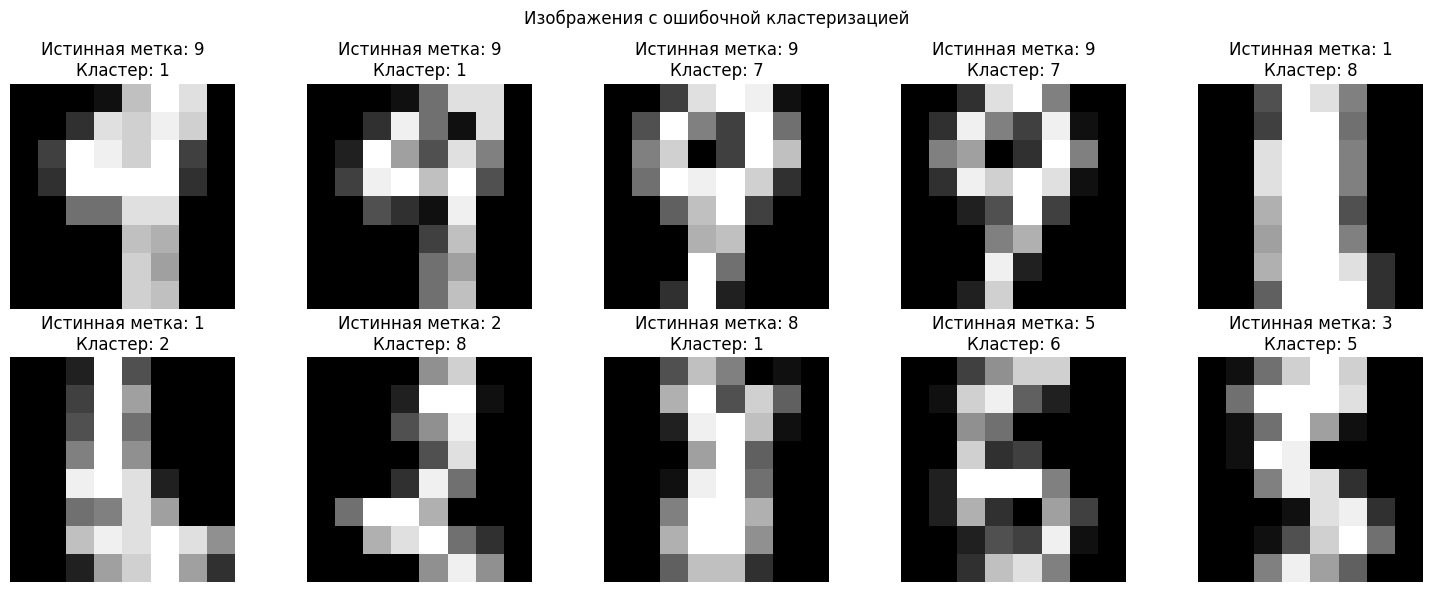

In [10]:
if misclustered_indices:
    rng = np.random.default_rng(seed=42)
    n_display = min(10, len(misclustered_indices))
    selected_indices = rng.choice(misclustered_indices, size=n_display, replace=False)

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(selected_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_shuffled[idx].reshape(8, 8), cmap='gray')
        plt.title(f'Истинная метка: {y_shuffled[idx]}\nКластер: {cluster_dominant_label[cluster_assignments[idx]]}')
        plt.axis('off')
    plt.suptitle('Изображения с ошибочной кластеризацией')
    plt.tight_layout()
    plt.show()
else:
    print("Ошибок кластеризации не обнаружено!")

## Разделение изображения на семантические компоненты

![RedPanda](http://imgur.com/6Aa52Lm.png)

Алгоритмы кластеризации могут применяться в самых разных целях. Например, в анализе изображений есть задача разделения изображения на семантические компоненты, которую можно решать в том числе с помощью алгоритмов кластеризации.

Загрузите [изображения](https://www.dropbox.com/s/ybnvkemeus9wupe/images.zip?dl=0).

In [11]:
image_url = "https://www.interfax.ru/ftproot/photos/photostory/2021/01/19/trump10_700.jpg"
try:
    response = requests.get(image_url, timeout=10)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content)).convert('RGB')
    print("Изображение грибов успешно загружено.")
except Exception as e:
    print(f"Ошибка загрузки изображения: {e}")
    exit(1)

image_array = np.array(image)
height, width, channels = image_array.shape
pixels_rgb = image_array.reshape(-1, channels)

print(f"Размер изображения: {width}x{height}, пикселей: {pixels_rgb.shape[0]}")

Изображение грибов успешно загружено.
Размер изображения: 1100x700, пикселей: 770000


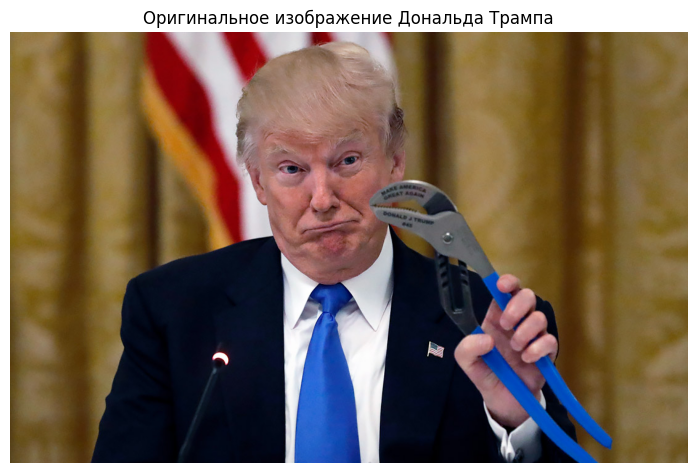

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title('Оригинальное изображение Дональда Трампа')
plt.axis('off')
plt.tight_layout()
plt.show()

**4. (1 балл)** Для каждого изображения, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель вектором признаков $\psi_i = [\lambda x_i, \lambda y_i, r_i, g_i, b_i]$, где
$x_i$ и $y_i$ — координаты пикселя, $r_i, g_i, b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

In [13]:
x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))
x_coords = x_coords.flatten() / width
y_coords = y_coords.flatten() / height

lambda_weight = 0.1

feature_vectors = np.column_stack((
    lambda_weight * x_coords,
    lambda_weight * y_coords,
    pixels_rgb / 255.0
))

print(f"Размер векторов признаков: {feature_vectors.shape}")

Размер векторов признаков: (770000, 5)


In [14]:
n_clusters = 5
try:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(feature_vectors)
except Exception as e:
    print(f"Ошибка кластеризации: {e}")
    exit(1)

segmented_pixels = kmeans.cluster_centers_[cluster_labels, 2:] * 255
segmented_array = segmented_pixels.reshape(height, width, channels).astype(np.uint8)

print(f"Кластеризация завершена, выделено {n_clusters} кластеров.")

Кластеризация завершена, выделено 5 кластеров.


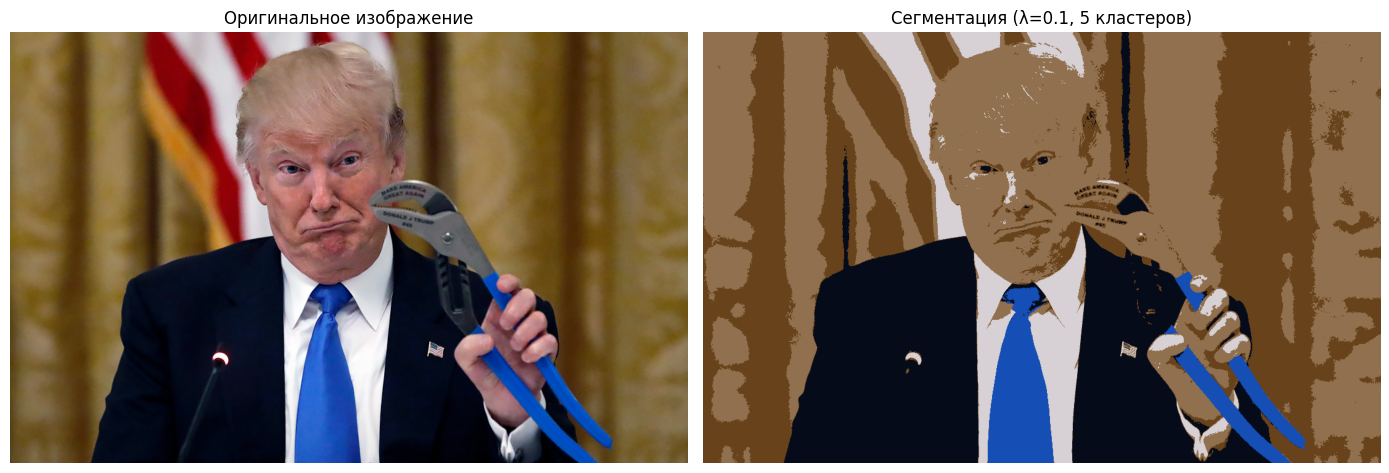

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title('Оригинальное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_array)
plt.title(f'Сегментация (λ={lambda_weight}, {n_clusters} кластеров)')
plt.axis('off')

plt.tight_layout()
plt.show()

**5. (1 балл)** Попробуйте выделить сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету. При необходимости можно сжать изображения в 2 раза.

In [16]:
image_array = np.array(image)
small_image = resize(image_array, (image_array.shape[0] // 10, image_array.shape[1] // 10), anti_aliasing=True)
gray_image = rgb2gray(small_image)
height, width = gray_image.shape

print(f"Размер уменьшенного изображения: {width}x{height}")

Размер уменьшенного изображения: 110x70


In [17]:
lambda_val = 0.1
n_clusters = 5

coords = np.mgrid[0:height, 0:width].reshape(2, -1).T / np.array([height, width])
intensity = gray_image.flatten().reshape(-1, 1)
features = np.hstack([lambda_val * coords, intensity])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

try:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(scaled_features).reshape(height, width)
except Exception as e:
    print(f"Ошибка KMeans: {e}")
    exit(1)

print("KMeans кластеризация завершена.")

KMeans кластеризация завершена.


In [18]:
from sklearn.cluster import SpectralClustering

try:
    spectral = SpectralClustering(
        n_clusters=n_clusters,
        affinity='nearest_neighbors',
        n_neighbors=5,
        random_state=42
    )
    spectral_labels = spectral.fit_predict(scaled_features).reshape(height, width)
except Exception as e:
    print(f"Ошибка спектральной кластеризации: {e}")
    exit(1)

print("Спектральная кластеризация завершена.")

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Спектральная кластеризация завершена.


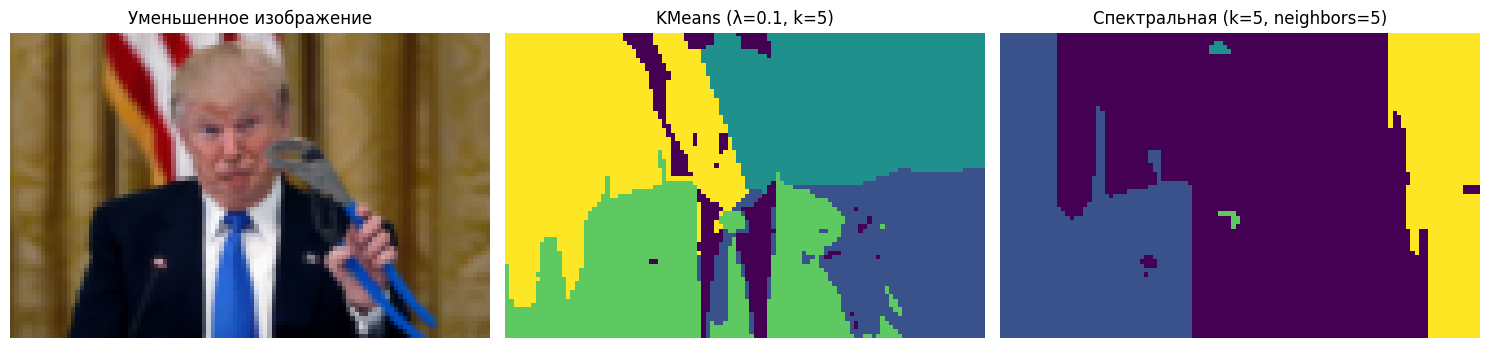

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(small_image)
plt.title('Уменьшенное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(kmeans_labels, cmap='viridis')
plt.title(f'KMeans (λ={lambda_val}, k={n_clusters})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(spectral_labels, cmap='viridis')
plt.title(f'Спектральная (k={n_clusters}, neighbors=5)')
plt.axis('off')

plt.tight_layout()
plt.show()

**6. (1 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше) для обоих методов. [Пример кода для визуализации](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html).

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(small_image)
plt.title('Уменьшенное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(kmeans_labels, cmap='viridis')
plt.title(f'KMeans (λ={lambda_val}, k={n_clusters})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(spectral_labels, cmap='viridis')
plt.title(f'Спектральная (k={n_clusters}, neighbors=5)')
plt.axis('off')

plt.tight_layout()
plt.savefig('mushroom_segmentation_comparison.png')
plt.close()

**7. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два подхода и сегментации, к которым они приводят.
Для всех ли изображений в результате сегментации хорошо видны контуры объектов?

Форма coords: (7700, 2)
Форма intensity: (7700, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


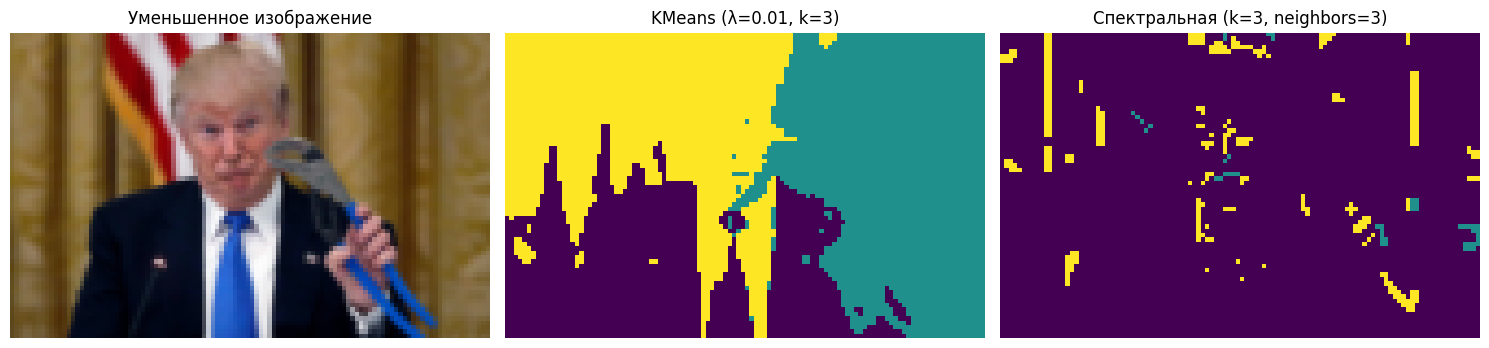

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


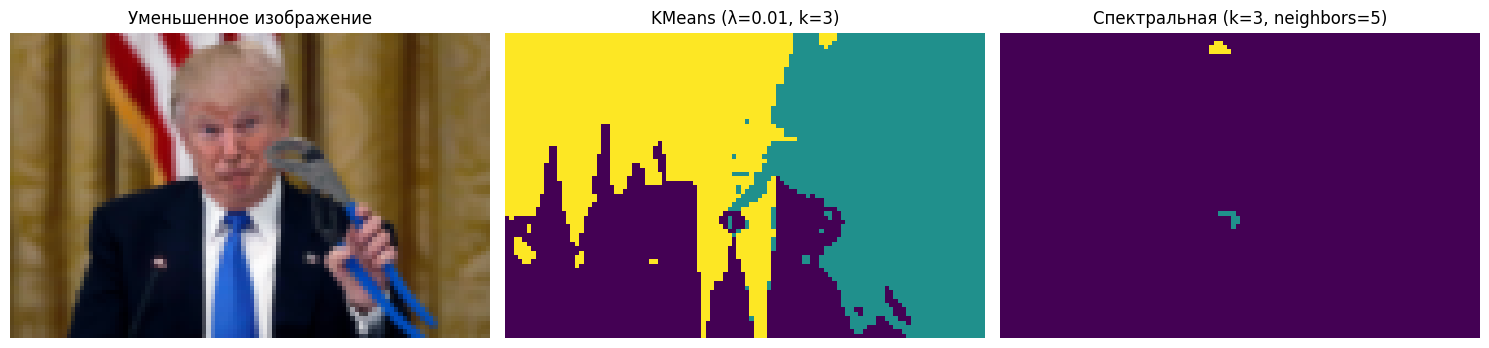

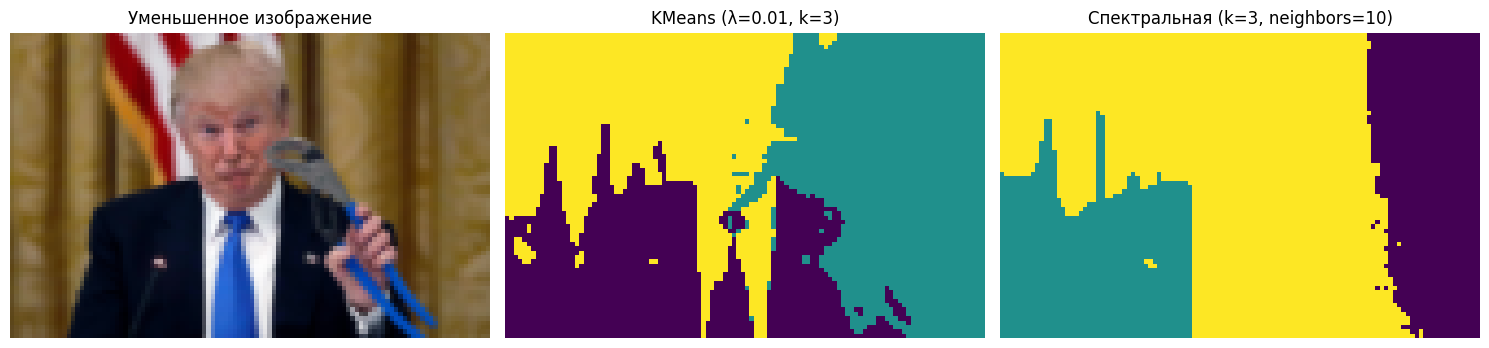

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


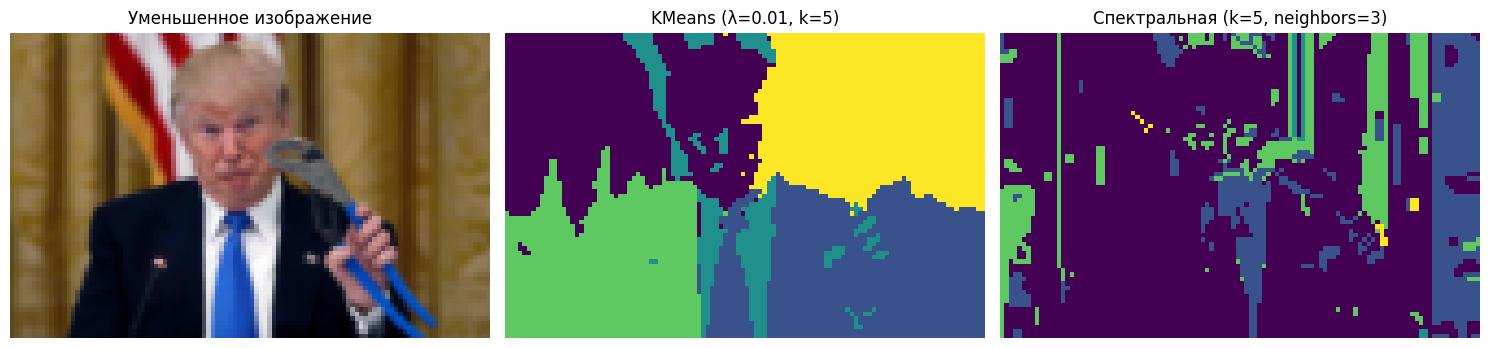

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


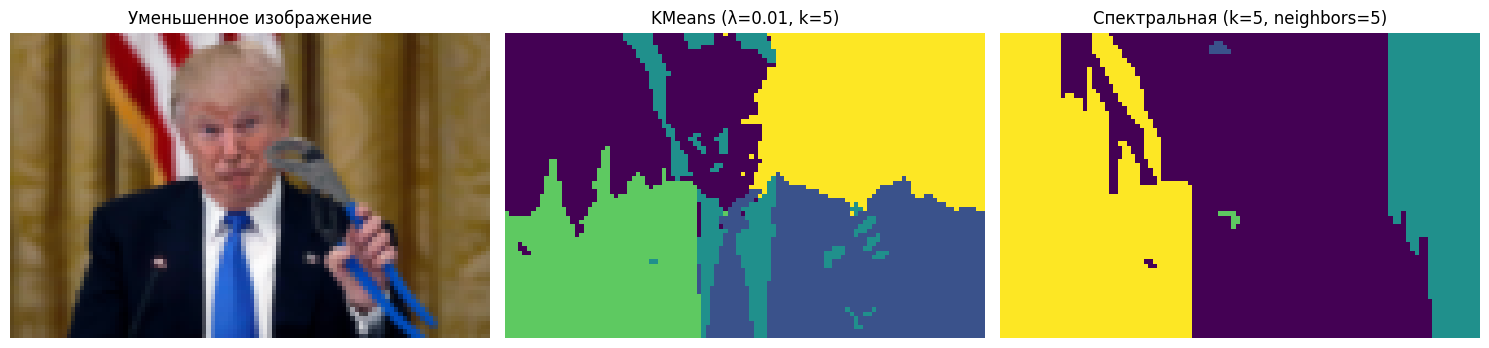

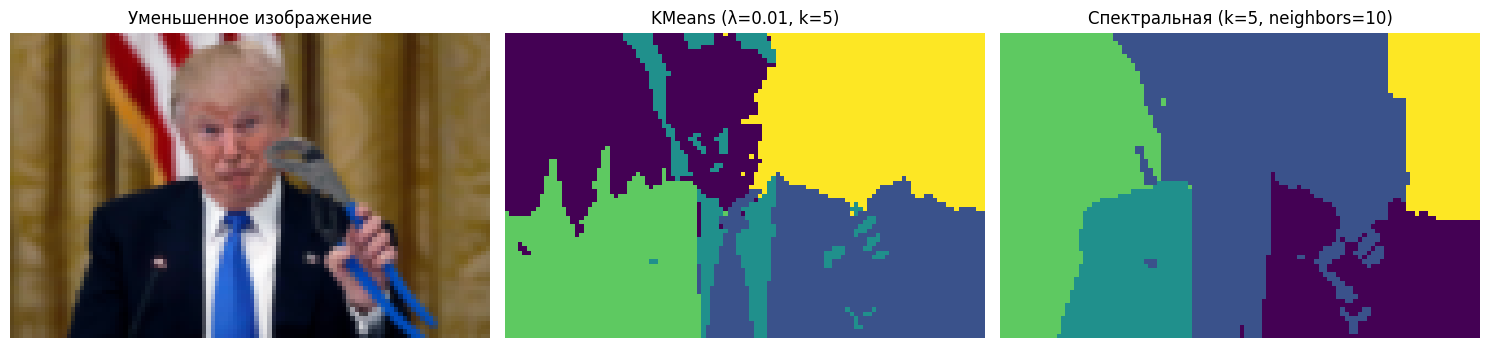

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


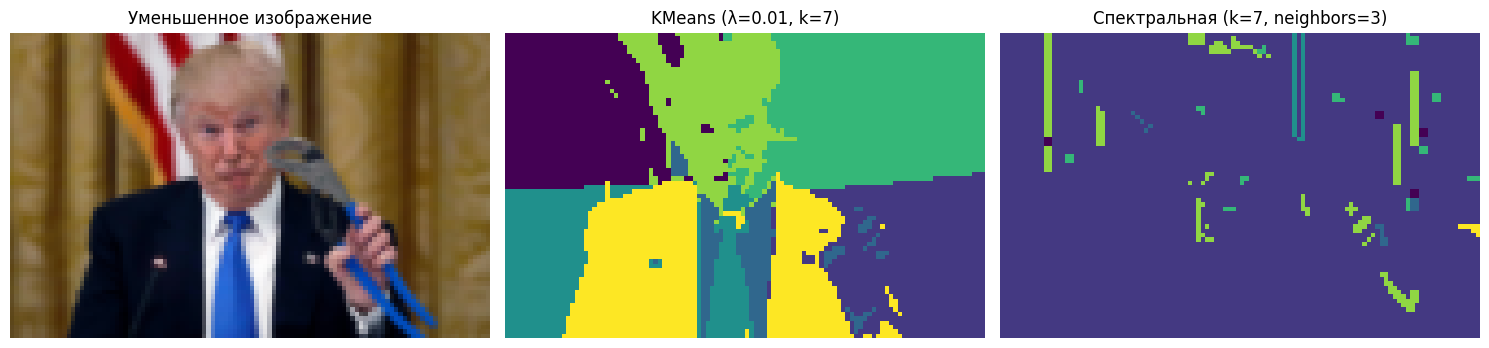

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


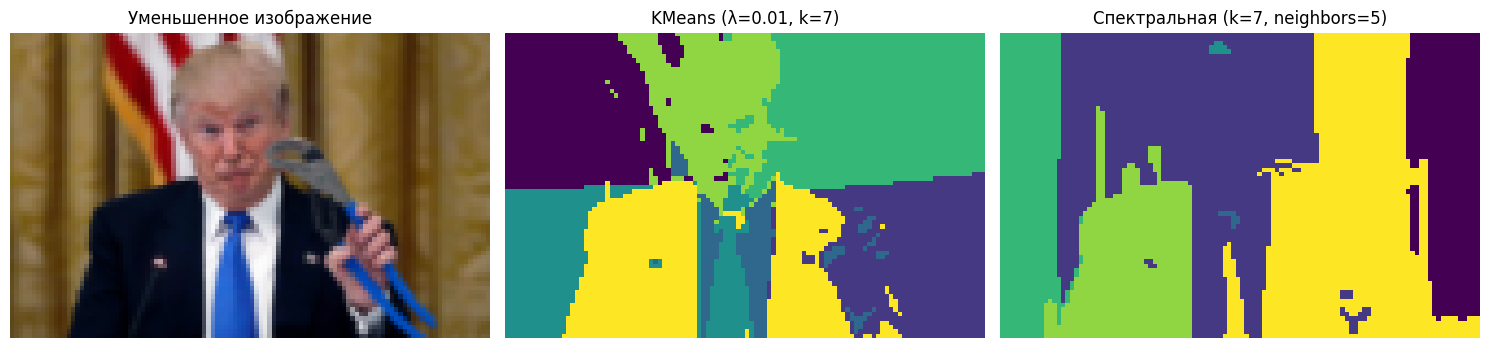

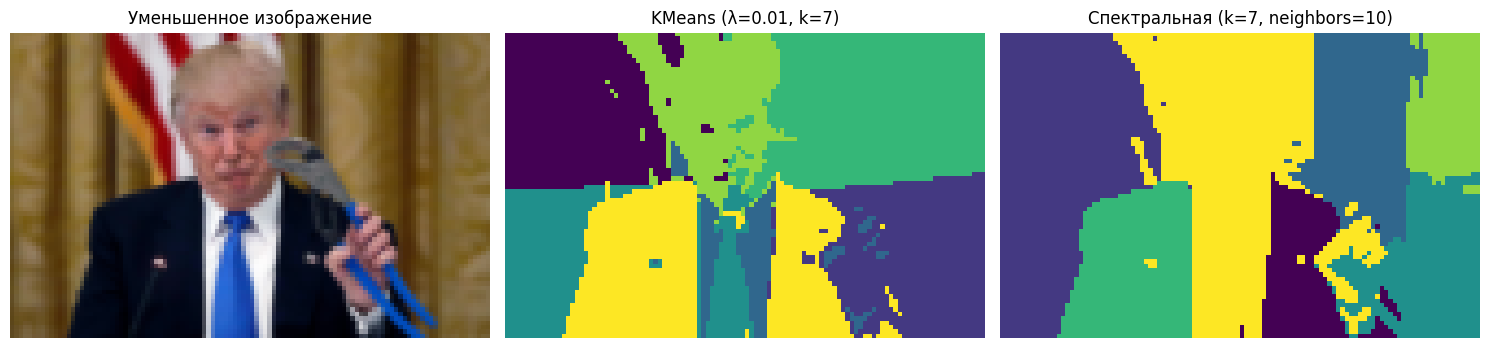

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


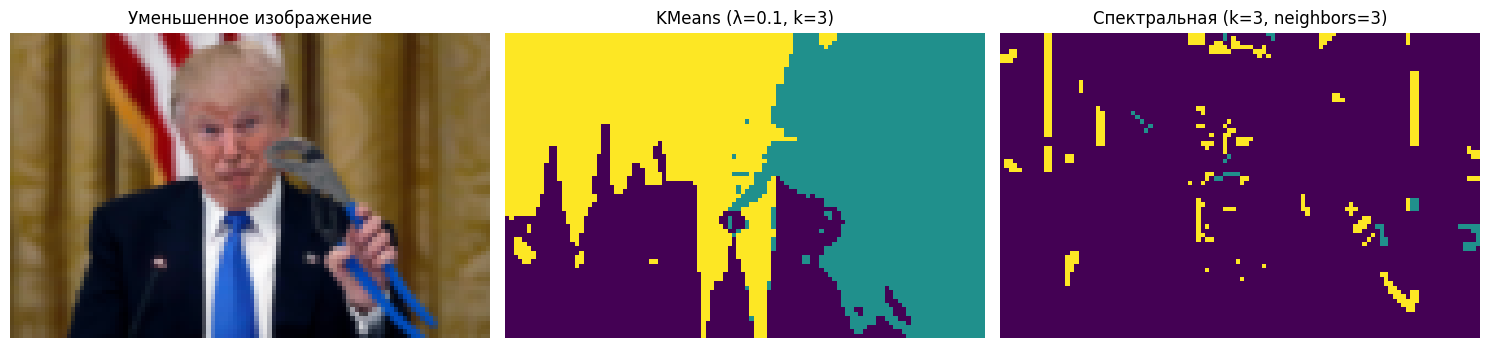

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


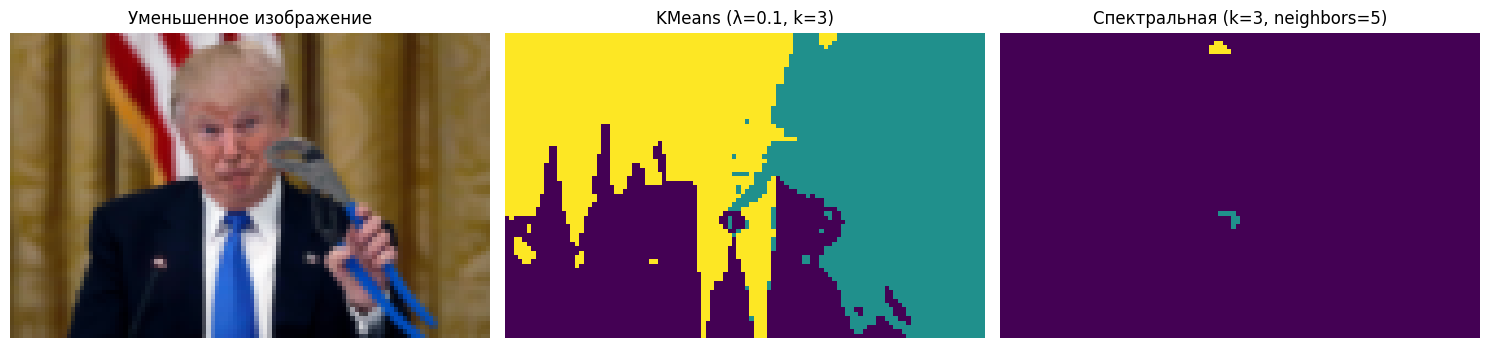

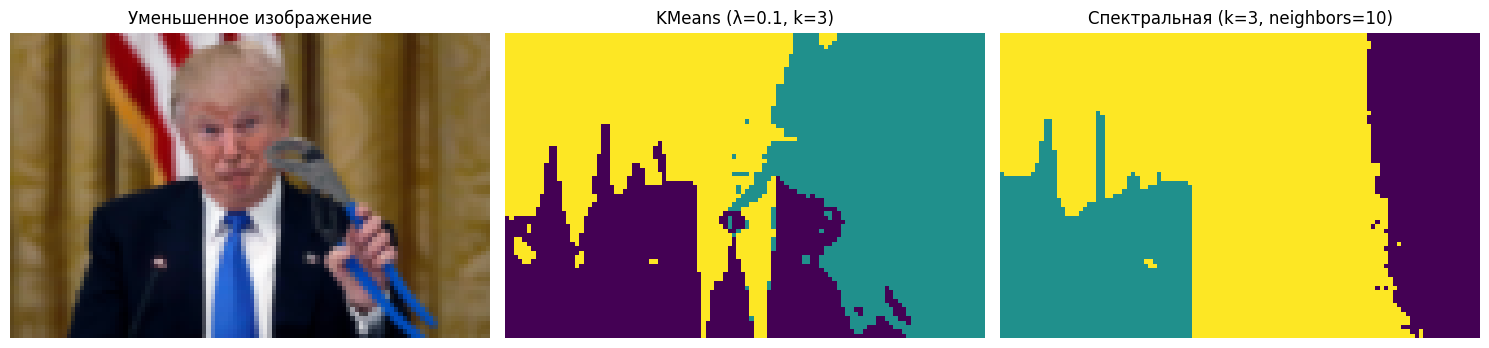

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


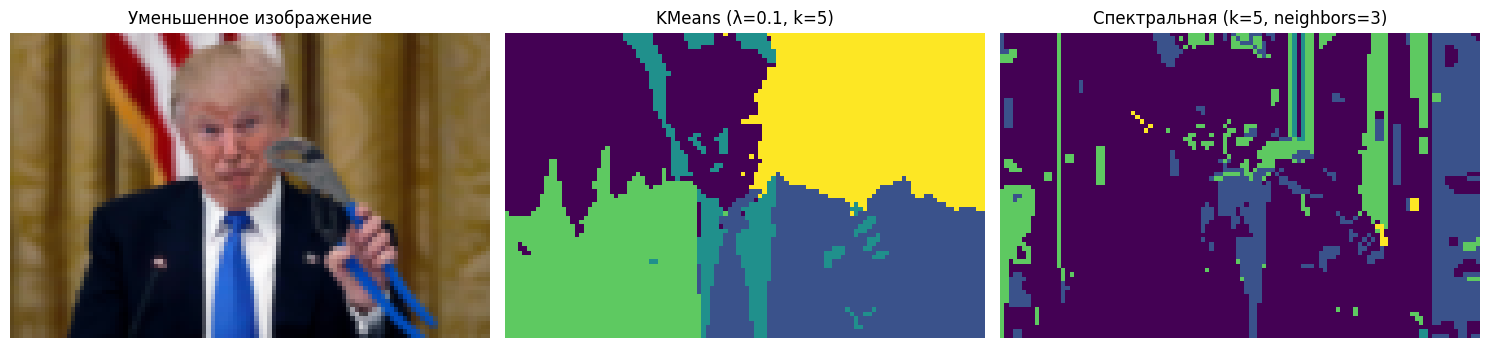

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


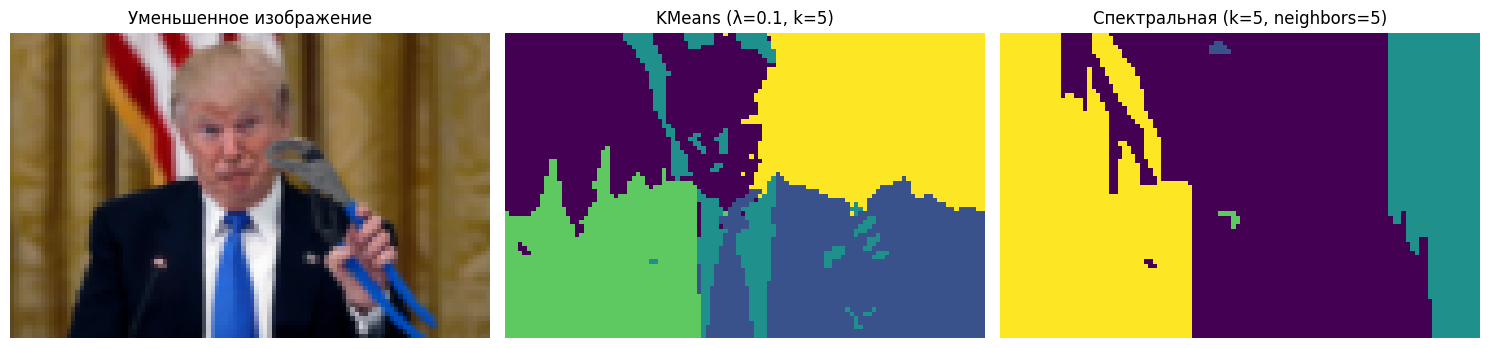

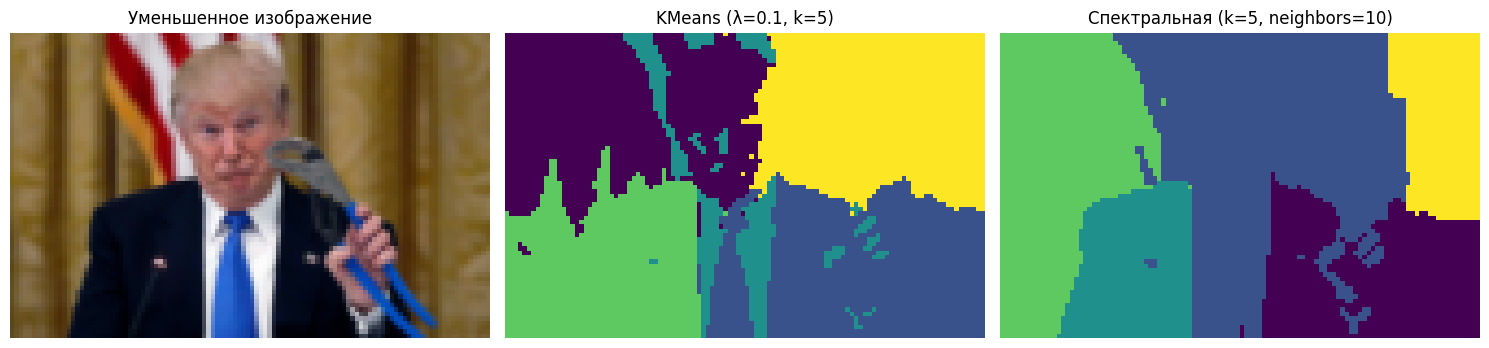

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


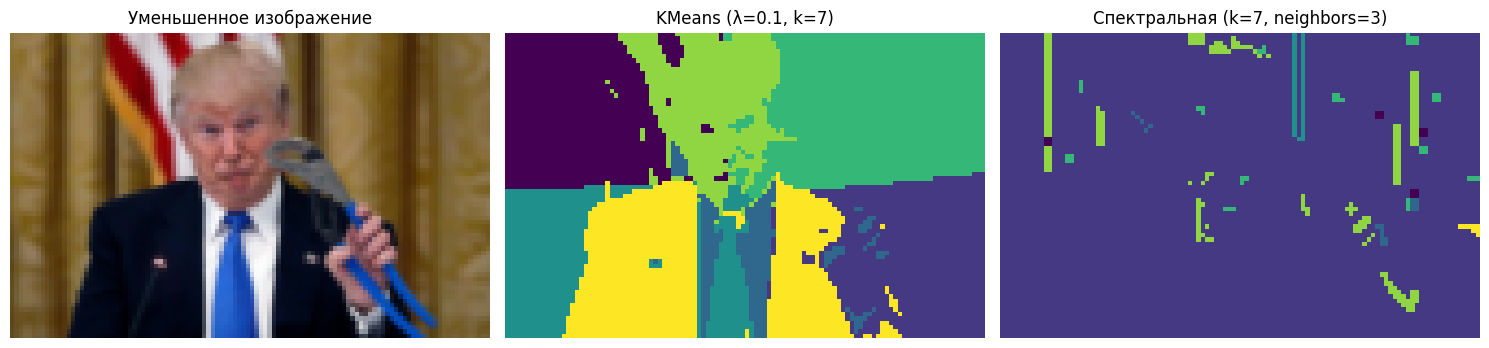

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


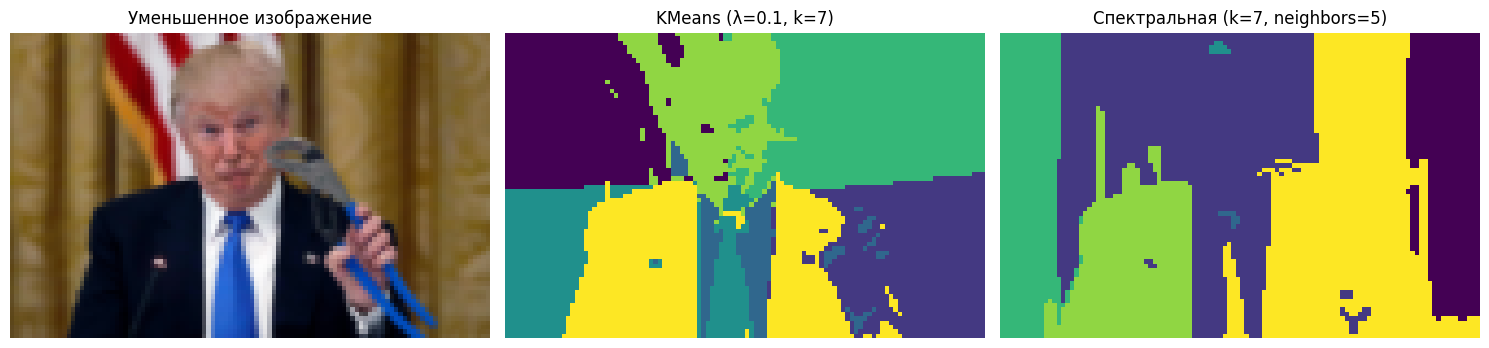

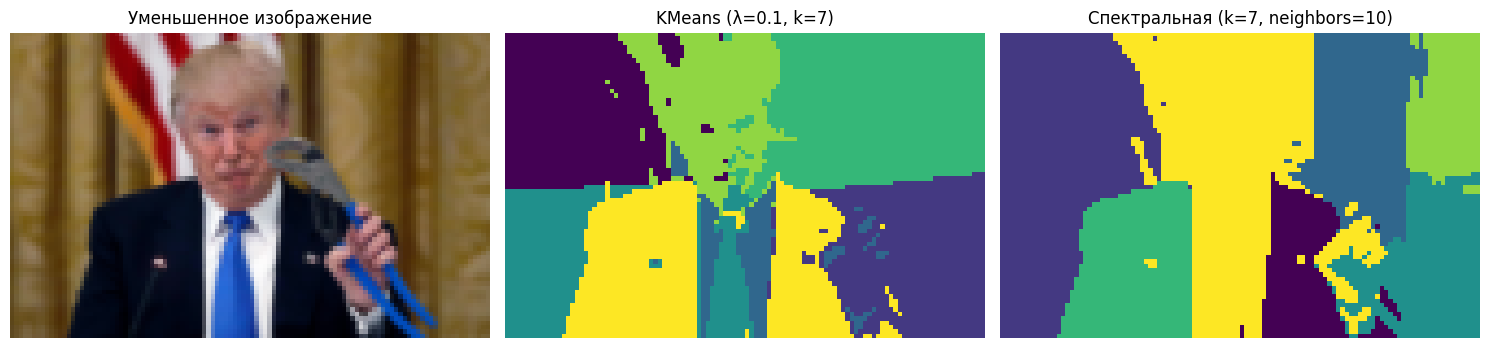

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


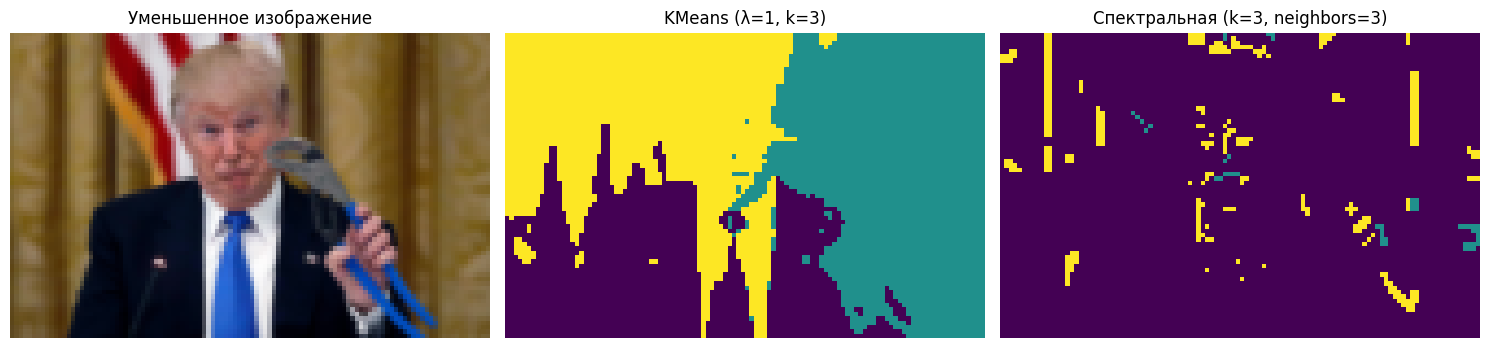

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


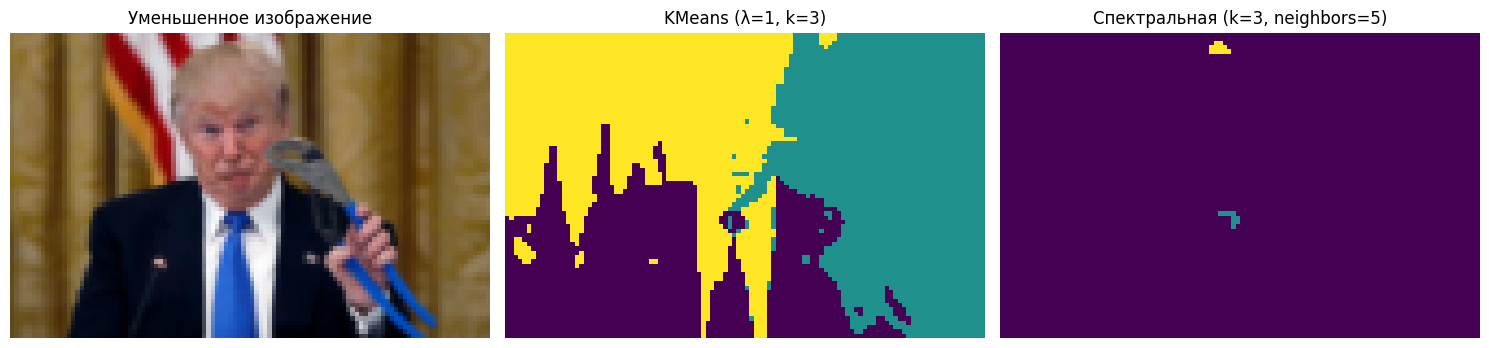

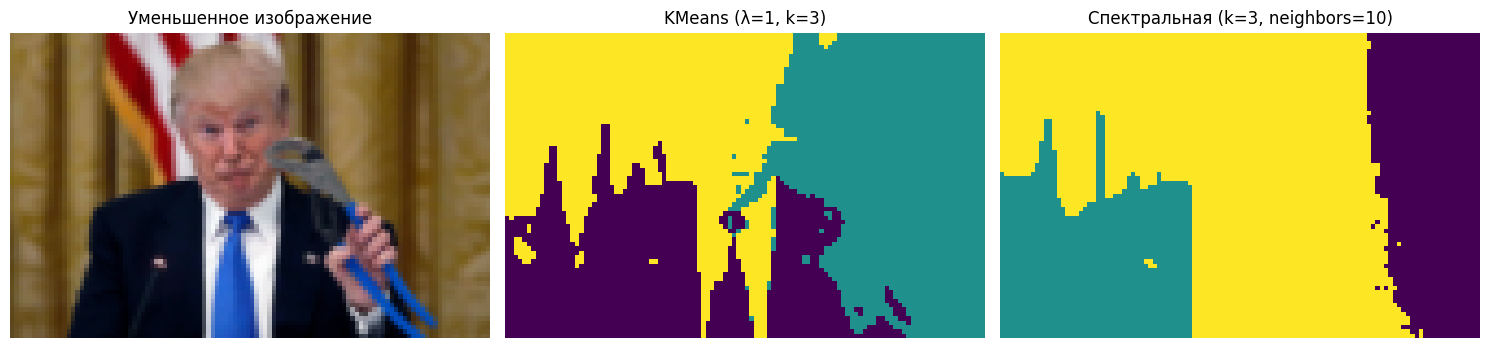

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


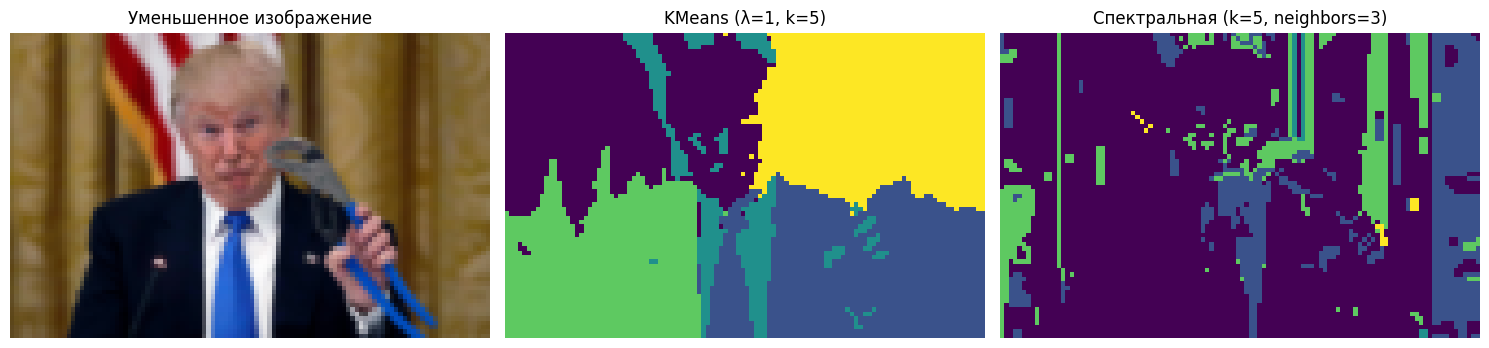

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


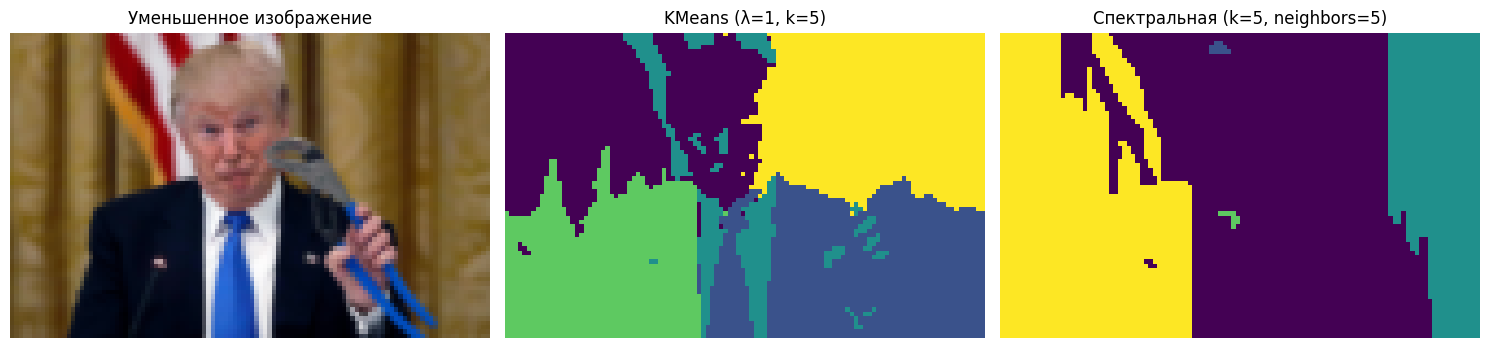

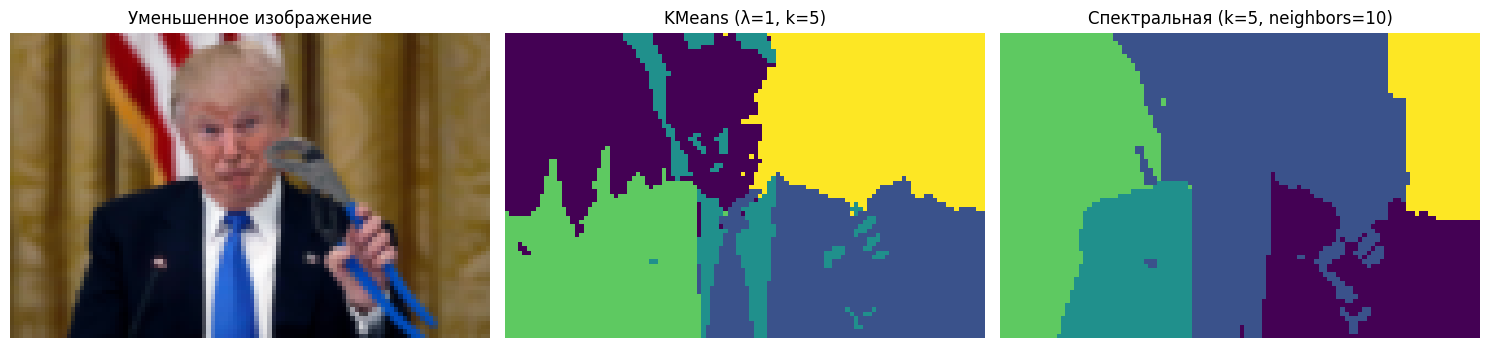

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


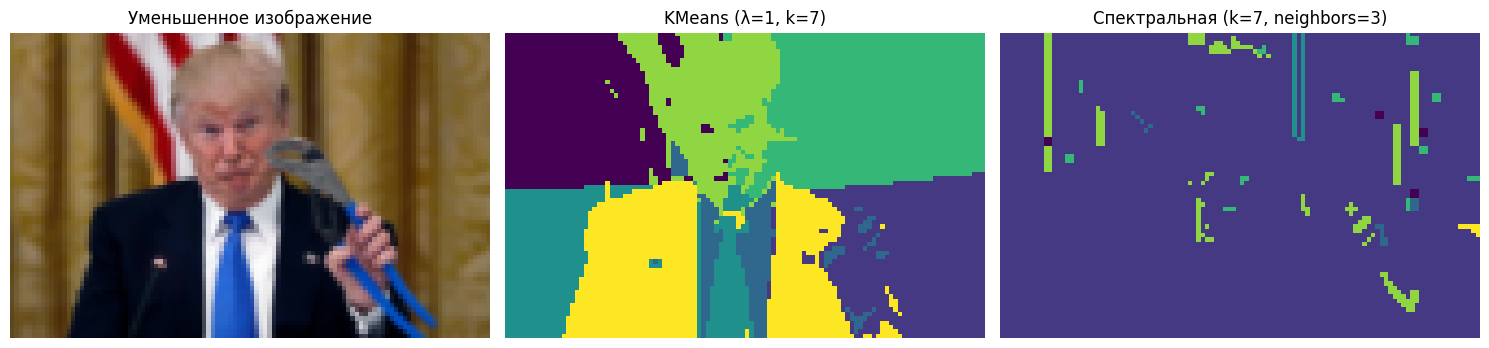

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


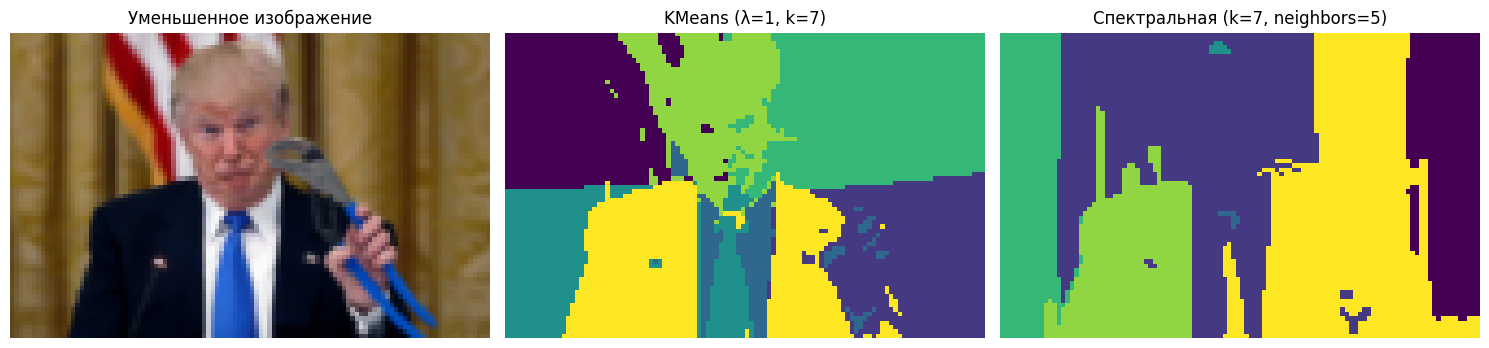

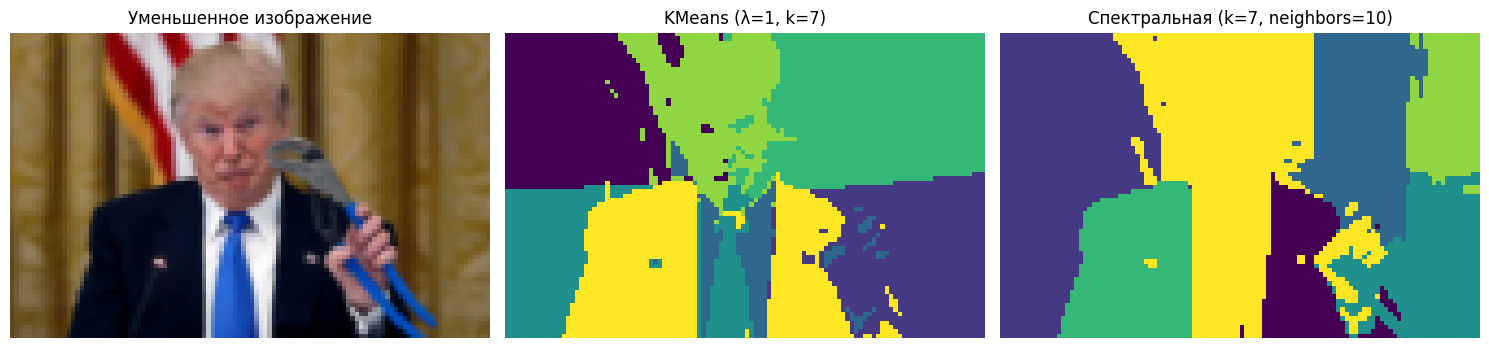

In [21]:
import numpy as np
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

scale = 10
lambda_values = [0.01, 0.1, 1]
n_clusters_list = [3, 5, 7]
n_neighbors_list = [3, 5, 10]

image_array = np.array(image)
small_image = resize(
    image_array,
    (image_array.shape[0] // scale, image_array.shape[1] // scale),
    anti_aliasing=True
)

height, width = small_image.shape[:2]
if small_image.ndim == 3:
    gray_image = np.mean(small_image, axis=2)
else:
    gray_image = small_image

coords = np.mgrid[0:height, 0:width].reshape(2, -1).T / np.array([height, width])

intensity = gray_image.flatten().reshape(-1, 1)

print(f"Форма coords: {coords.shape}")
print(f"Форма intensity: {intensity.shape}")

features_cache = {
    lambda_val: StandardScaler().fit_transform(np.hstack([lambda_val * coords, intensity]))
    for lambda_val in lambda_values
}

for lambda_val in lambda_values:
    scaled_features = features_cache[lambda_val]
    for n_clusters in n_clusters_list:

        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        kmeans_labels = kmeans.fit_predict(scaled_features).reshape(height, width)

        for n_neighbors in n_neighbors_list:

            if scaled_features.shape[0] > 10000:
                indices = np.random.choice(scaled_features.shape[0], size=10000, replace=False)
                features_sub = scaled_features[indices]
            else:
                features_sub = scaled_features

            spectral = SpectralClustering(
                n_clusters=n_clusters,
                affinity='nearest_neighbors',
                n_neighbors=n_neighbors,
                random_state=42,
                n_jobs=-1
            )

            labels = spectral.fit_predict(features_sub)

            if scaled_features.shape[0] > 10000:
                spectral_labels = np.zeros(scaled_features.shape[0], dtype=int)
                spectral_labels[indices] = labels
            else:
                spectral_labels = labels
            spectral_labels = spectral_labels.reshape(height, width)

            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(small_image, cmap='gray' if small_image.ndim == 2 else None)
            plt.title('Уменьшенное изображение')
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(kmeans_labels, cmap='viridis')
            plt.title(f'KMeans (λ={lambda_val}, k={n_clusters})')
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(spectral_labels, cmap='viridis')
            plt.title(f'Спектральная (k={n_clusters}, neighbors={n_neighbors})')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

---

**Сравнение подходов**

**KMeans:**

Плюсы: Быстрее, проще в реализации, хорошо работает для компактных кластеров.
Минусы: Предполагает сферические кластеры, что может плохо выделять сложные формы. При низком lambda (0.01) игнорирует пространственную связность, при высоком lambda (1) переоценивает координаты, разбивая объекты.
Эффект параметров:

lambda = 0.01: Сегментация почти полностью основана на интенсивности, контуры грибов могут быть размыты.
lambda = 1: Усиление пространственной связности делает кластеры компактными, но может объединять разные объекты.
k = 3: Грубая сегментация, грибы и фон сливаются.
k = 7: Более детализировано, но появляются лишние кластеры.

</br>

**Спектральная кластеризация:**

Плюсы: Лучше учитывает локальную структуру благодаря графовому подходу, выделяет сложные формы.
Минусы: Медленнее, чувствительна к n_neighbors. Требует больше памяти.
Эффект параметров:

lambda: Аналогично KMeans, но эффект координат смягчается графом связности.
n_neighbors = 3: Может быть шумной, так как связи ограничены.
n_neighbors = 10: Более гладкие контуры, но медленнее.
k = 3: Простая сегментация.
k = 7: Детализирует мелкие области.

**Видны ли контуры объектов?**

KMeans: Контуры грибов видны хорошо при lambda = 0.1, k = 5, так как интенсивность и умеренная пространственная связность разделяют грибы и фон. При lambda = 0.01 или k = 3 контуры могут сливаться, при lambda = 1 или k = 7 появляются лишние границы.

Спектральная: Контуры более четкие, особенно при n_neighbors = 5–10, так как алгоритм учитывает локальные связи. Однако при n_neighbors = 3 возможен шум, а при k = 3 грибы и фон могут объединяться.
Для всех ли изображений?

Нет, не для всех. Если изображение имеет низкий контраст (например, грибы сливаются с фоном) или сложные текстуры, оба метода могут плохо выделять контуры:

KMeans: Плохо справляется с неравномерным освещением или текстурами, так как игнорирует локальную структуру.

Спектральная: Лучше, но при малом n_neighbors или неподходящем lambda контуры могут быть шумными.
Для изображений с четкими цветовыми различиями (как грибы на контрастном фоне) контуры обычно видны хорошо, особенно при оптимальных параметрах (lambda = 0.1, k = 5, n_neighbors = 5).

---

Измерять качество сегментации в этом пункте не нужно, в результате ожидаются только картинки и выводы.

### Рекомендации к выполнению
Для работы с изображениями удобно использовать библиотеку [Scikit-Image](http://scikit-image.org).
Установите [PIL](http://www.pythonware.com/products/pil/) для возможности чтения формата JPG.

Пример чтения изображения в матрицу:

    from skimage.io import imread
    I = imread('http://www.birdsgallery.net/gallery/parrots/parrots_4.jpg')

    figure(figsize=(15, 5))
        for i in xrange(3):
        subplot(1, 3, i)
        imshow(I[:,:,i])

## Word2vec

**8. (3 балла)**
1. [Скачайте данные](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
2. [Установите необходимые библиотеки](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/setting-up-your-system)
3. Внимательно изучите тьториалы, доступные в рамках контеста [Part 1](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words) – [Part 4](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-4-comparing-deep-and-non-deep-learning-methods). Эти статьи очень полезны для понимания принципов анализа текстовых данных в питоне.
4. Согласно тьюториалам подготовить данные и обучить модель word2vec. Полезно засечь время обучения модели.
5. Протестировать модель на датасете, подготовленном Google, с задачами вида: *London → England*, значит, *Berlin → Germany*. Пример вызова нужной функции и описание датасета есть [тьюториале по word2vec](https://rare-technologies.com/word2vec-tutorial/). Сам датасет можно скачать по [ссылке](https://www.dropbox.com/s/prb8n5b5na5qo07/questions-words.txt?dl=0). С чем может быть связано большое число неверных ответов?
6. Привести по 5-10 примеров для задачи поиска лишнего слова *(model.doesnt_match)* и для задачи поиска семантически близких слов *(model.most_similar)*. Проинтерпретировать полученные результаты. Все ли примеры соответствуют здравому смыслу? По каким принципам группируются близкие слова в выбранных вами примерах?

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import numpy as np

In [23]:
sentences = [
    "I love machine learning",
    "Word2Vec is a great tool",
    "Deep learning requires data",
    "Berlin is the capital of Germany",
    "London is the capital of England"
]

word_counts = Counter()
for sentence in sentences:
    word_counts.update(sentence.lower().split())
vocab = {word: idx for idx, word in enumerate(word_counts.keys())}
vocab_size = len(vocab)

skip_grams = []
for sentence in sentences:
    words = sentence.lower().split()
    for i, target_word in enumerate(words):
        for j in range(max(0, i-2), min(i+3, len(words))):
            if i != j:
                skip_grams.append((vocab[target_word], vocab[words[j]]))

class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x = self.linear(x)
        return x

model = Word2Vec(vocab_size, 50)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

for epoch in range(100):
    for target, context in skip_grams:
        optimizer.zero_grad()
        output = model(torch.tensor([target]))
        loss = criterion(output, torch.tensor([context]))
        loss.backward()
        optimizer.step()

word_vectors = model.embedding.weight.detach().numpy()

from sklearn.metrics.pairwise import cosine_similarity

def most_similar(word, topn=5):
    idx = vocab[word]
    vec = word_vectors[idx]
    sims = cosine_similarity([vec], word_vectors)[0]
    similar_ids = np.argsort(sims)[-topn-1:-1][::-1]
    words = list(vocab.keys())
    return [(words[i], sims[i]) for i in similar_ids]

print("Ближайшие слова к 'learning':")
print(most_similar('learning'))

Ближайшие слова к 'learning':
[('machine', np.float32(0.15407366)), ('i', np.float32(0.11220907)), ('word2vec', np.float32(0.09918773)), ('requires', np.float32(0.08549489)), ('berlin', np.float32(0.07242487))]
